In [4]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt


# 1. Dataset

Dimensions de X : (100, 2)


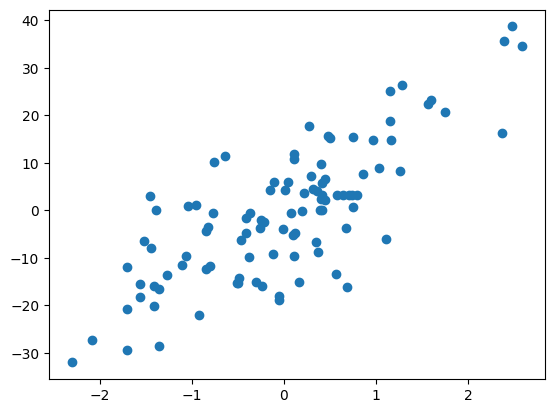

In [540]:
m = 100
n = 1

x, y = make_regression(n_samples=m, n_features=n, noise=10)
y = y.reshape(y.shape[0], 1)


# Matrice X de dimension (m, n+1)=(100, 2)
X = np.hstack((x, np.ones(x.shape)))
print(f"Dimensions de X : {X.shape}")

plt.scatter(x, y)
plt.show()

In [541]:
# Initialiser le vecteur theta (n+1, 1) = (2, 1)
theta0 = np.random.randn(n+1, 1)
print(f"Dimension theta : {theta0.shape}")
theta0



Dimension theta : (2, 1)


array([[0.98006328],
       [0.1433151 ]])

# 2. Model Y = X.theta

In [165]:
def model(X, theta):
    return X @ theta

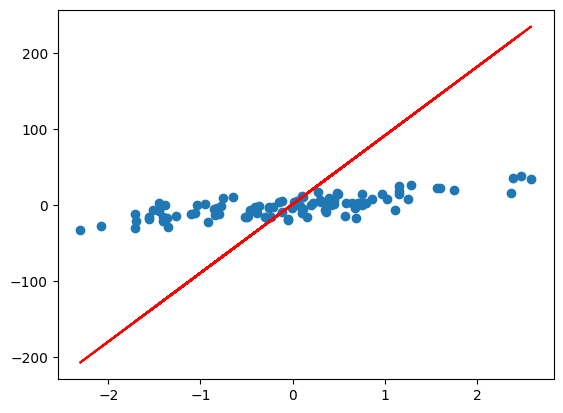

In [546]:
# tester le model 
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')
plt.show()

# 3. Fonction coût

In [ ]:
def loss_function(X, theta, y):
    return 1/2*m * np.sum((model(X, theta) - y)**2)

In [547]:
loss0 = loss_function(X, theta, y)
loss0

np.float64(32990433.133226186)

# Gradient et Gradient descent

In [168]:
def grad(X, theta, y):
    return 1/m * X.T @ (model(X, theta) - y)

In [478]:
def gradient_descent(X, y, learning_rate, n_iterations):
    theta = np.random.randn(n+1, 1)
    thetas = []
    for _ in range(n_iterations):
        gradient = grad(X, theta, y)
        theta -= learning_rate * gradient
        thetas.append(theta.copy())  
    return thetas

# Evaluation de model

In [535]:
def evaluations(n_iterations, learning_rates):
    for n_iteration in n_iterations:
        best_mse, best_learning_rate, best_n_iterations = loss0, 0, 0
        loss_history = ""
        theta_final = ""
        
        for learning_rate in learning_rates:
            thetas = gradient_descent(X, y, learning_rate, n_iteration)
            predictions = model(X, thetas[-1])
            mse = loss_function(X, thetas[-1], y)
        
            if  mse < mse_final:
                best_mse, best_n_iterations, best_learning_rate  = mse, n_iteration, learning_rate
                loss_history = [loss_function(X, theta, y) for theta in thetas]
                theta_final = thetas[-1]
            
    return best_mse, best_n_iterations, best_learning_rate, loss_history, theta_final  

MSE :  391791.9730886953
RMSE :  625.9328822555142
Itérations : 80
Learning_rate: 0.1
R2 : 0.6065461555488876


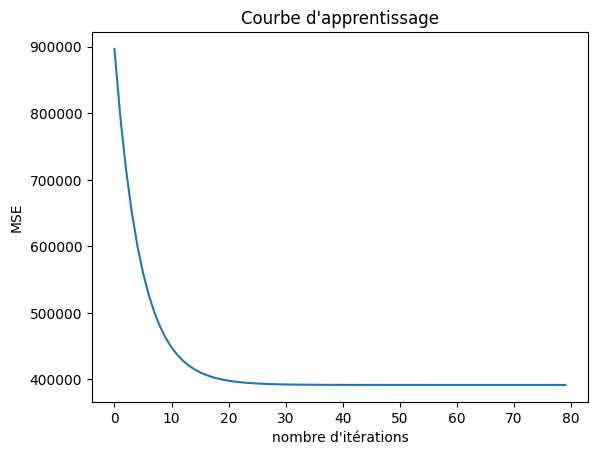

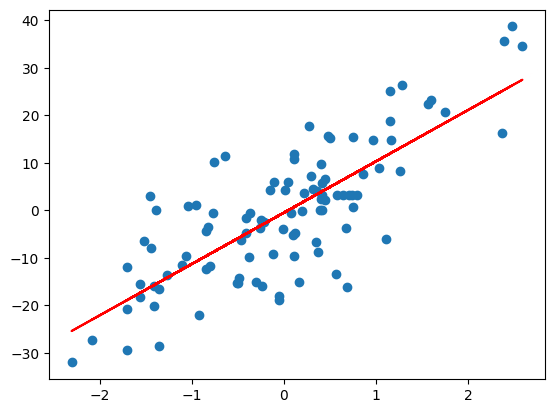

In [548]:
n_iterations = [10, 50, 80]
learning_rates = [0.0001, 0.001, 0.01, 0.1]

best_mse, best_n_iterations, best_learning_rate, loss_history, theta_f = evaluations(n_iterations, learning_rates)

predictions_finales = model(X, theta_f)


# Coefficient de R2
def coef_determination(y, predictions):
    u = ((y - predictions)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

# Meilleurs hyperparamètres
print(f"MSE : ", best_mse)
print(f"RMSE : ", np.sqrt(best_mse))
print(f"Itérations :", best_n_iterations)
print(f"Learning_rate:", best_learning_rate)
print(f"R2 : {coef_determination(y, predictions_finales)}")

# Courbe d'apprendtissage
fig = plt.figure()
plt.plot(range(best_n_iterations), loss_history)
plt.xlabel("nombre d'itérations")
plt.ylabel("MSE")
plt.title("Courbe d'apprentissage")
plt.show()

fig = plt.figure()
plt.scatter(x, y)
plt.plot(x, predictions_finales, c='r')
plt.show()